## Bank customer churn prediction

We have a dataset comprising of customer data that contains various features like salaries, age, credit score, etc.

#### Questions:

1. Identify and visualize which factors contribute to customer churn or a customer leaving the bank.
2. Build a machine learning model that predicts whether a given customer will churn or not.

### Data cleaning and preparation

In [207]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Load data

bank_data = pd.read_csv('Churn_Modelling.csv')

In [209]:
# First few entries

bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [210]:
total_entries = bank_data.shape[0]
print(f'Total number of entries: {total_entries}')

Total number of entries: 10000


In [211]:
# Number of null entries in each column

null_entries = bank_data.isna().sum()
null_entries

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

This tells us that either this data has been cleaned previously or we got lucky!

In [212]:
# Number of unique entries in each column

unique_entries = bank_data.nunique()

unique_entries

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

Here are some things we learn from the above:

1. The columns 'RowNumber', 'CustomerId' and 'Surname' are individual markers and not required for our study right now. So, we can drop them.
2. The Categorical columns are : 'Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember' and 'Exited'.
3. The Numerical columns are: 'CreditScore', 'Age', 'Balance' and 'EstimatedSalary'.

In [213]:
# Drop the first 3 columns

trimmed_data = bank_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=False)

trimmed_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [214]:
# Categorical columns

# categorical_columns = unique_entries[unique_entries < 4].index.tolist()
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

trimmed_data[categorical_columns].head()

,Geography,Gender,HasCrCard,IsActiveMember
0,France,Female,1,1
1,Spain,Female,0,1
2,France,Female,1,0
3,France,Female,0,0
4,Spain,Female,1,1


In [215]:
# Numerical columns

all_columns = set([col for col in trimmed_data.columns])


numerical_columns = list(all_columns - set(categorical_columns) - set(['Exited'])) # Removing categorical columns from all columns to find numerical columns
trimmed_data[numerical_columns].describe()

,NumOfProducts,EstimatedSalary,Age,Balance,Tenure,CreditScore
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.530200,100090.239881,38.921800,76485.889288,5.012800,650.528800
std,0.581654,57510.492818,10.487806,62397.405202,2.892174,96.653299
min,1.000000,11.580000,18.000000,0.000000,0.000000,350.000000
25%,1.000000,51002.110000,32.000000,0.000000,3.000000,584.000000
50%,1.000000,100193.915000,37.000000,97198.540000,5.000000,652.000000
75%,2.000000,149388.247500,44.000000,127644.240000,7.000000,718.000000
max,4.000000,199992.480000,92.000000,250898.090000,10.000000,850.000000


### Exploratory Data Analysis

We want to find what kind of features are related to the churn!



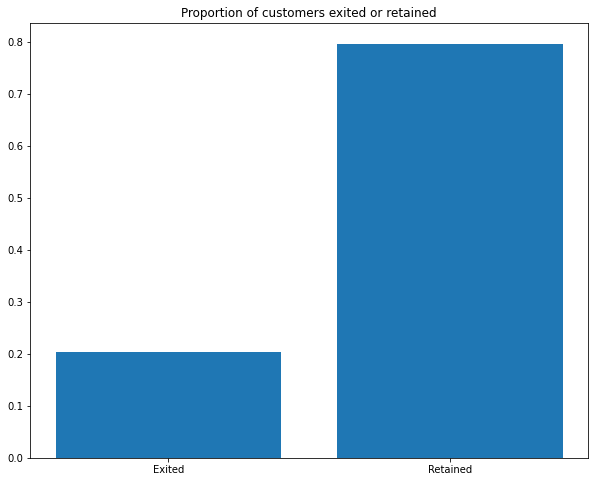

In [216]:
# Proportion of customers that left the bank
# sns.set_theme[style = 'whitegrid']

plt.figure(figsize=[10, 8])
# prop = ['Exited', 'Retained': (trimmed_data['Exited'] == 1).sum(), 'Retained': (trimmed_data['Exited'] == 0).sum()}
plt.bar(['Exited', 'Retained'], [(trimmed_data['Exited'] == 1).sum()/total_entries, (trimmed_data['Exited'] == 0).sum()/total_entries])
plt.title('Proportion of customers exited or retained')
plt.show()


This shows us that approximately 20% customers exited the bank for some reason. 

Let us look at how the categorical models affect the exit.

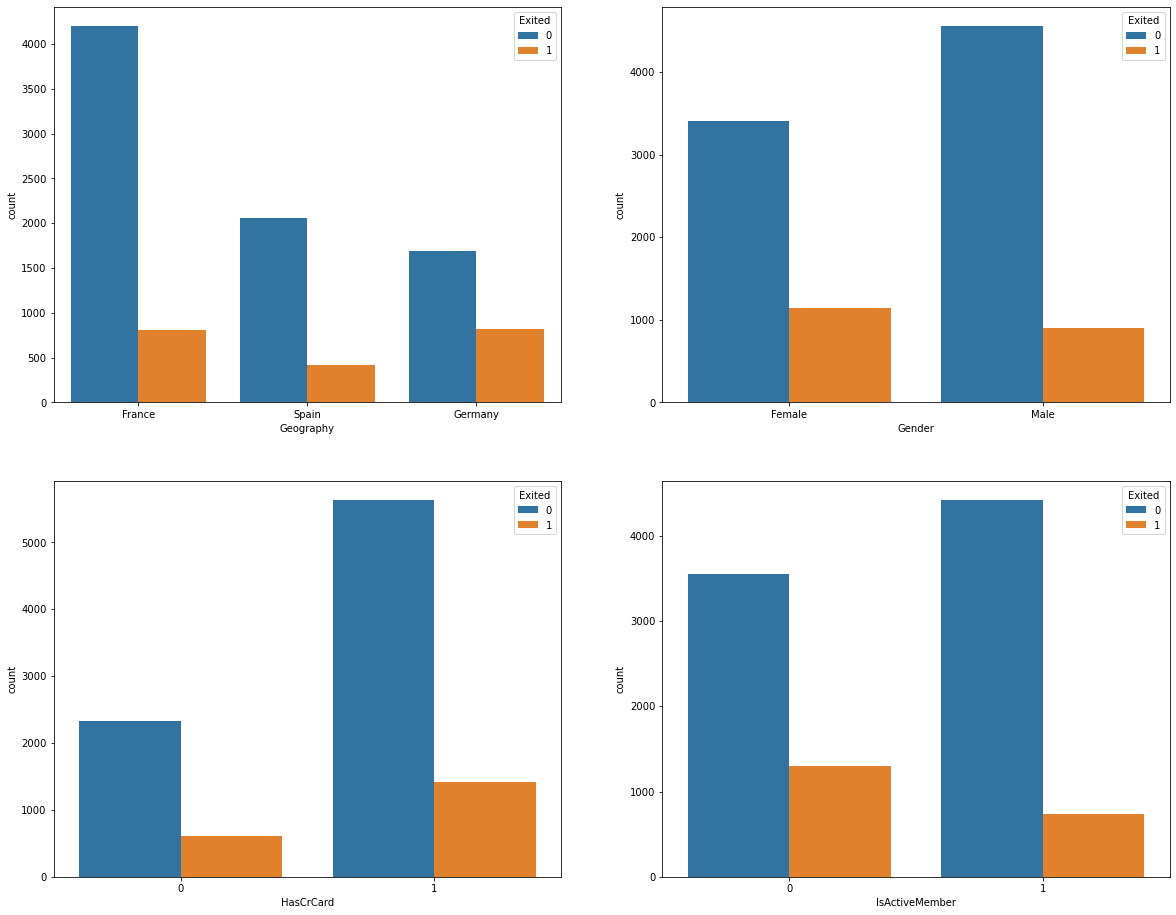

In [217]:
# Categorical columns

fig, axarr = plt.subplots(2, 2, figsize = [20, 16])
sns.countplot(x = 'Geography', hue = 'Exited', data=trimmed_data, ax=axarr[0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data=trimmed_data, ax=axarr[0][1])
sns.countplot(x = 'HasCrCard', hue = 'Exited', data=trimmed_data, ax=axarr[1][0])
sns.countplot(x = 'IsActiveMember', hue = 'Exited', data=trimmed_data, ax=axarr[1][1])
plt.show()

Some comments on the above:

1. Most of the bank customers are from France but it has a good retention rate. Germany and Spain have less number of customers with a large proportion of the German customers leaving the bank.

2. Number of male customers are slightly more than the female customers but the retention rate is better for males.

3. In this age of virtual currencies, most of the customers have a credit card. But around a quarter of them do not have a credit card. People having a credit card are contributing more to the churn, maybe due to a lot of debt accrued by them.

4. We can see that inactive members are more likely to leave the bank.

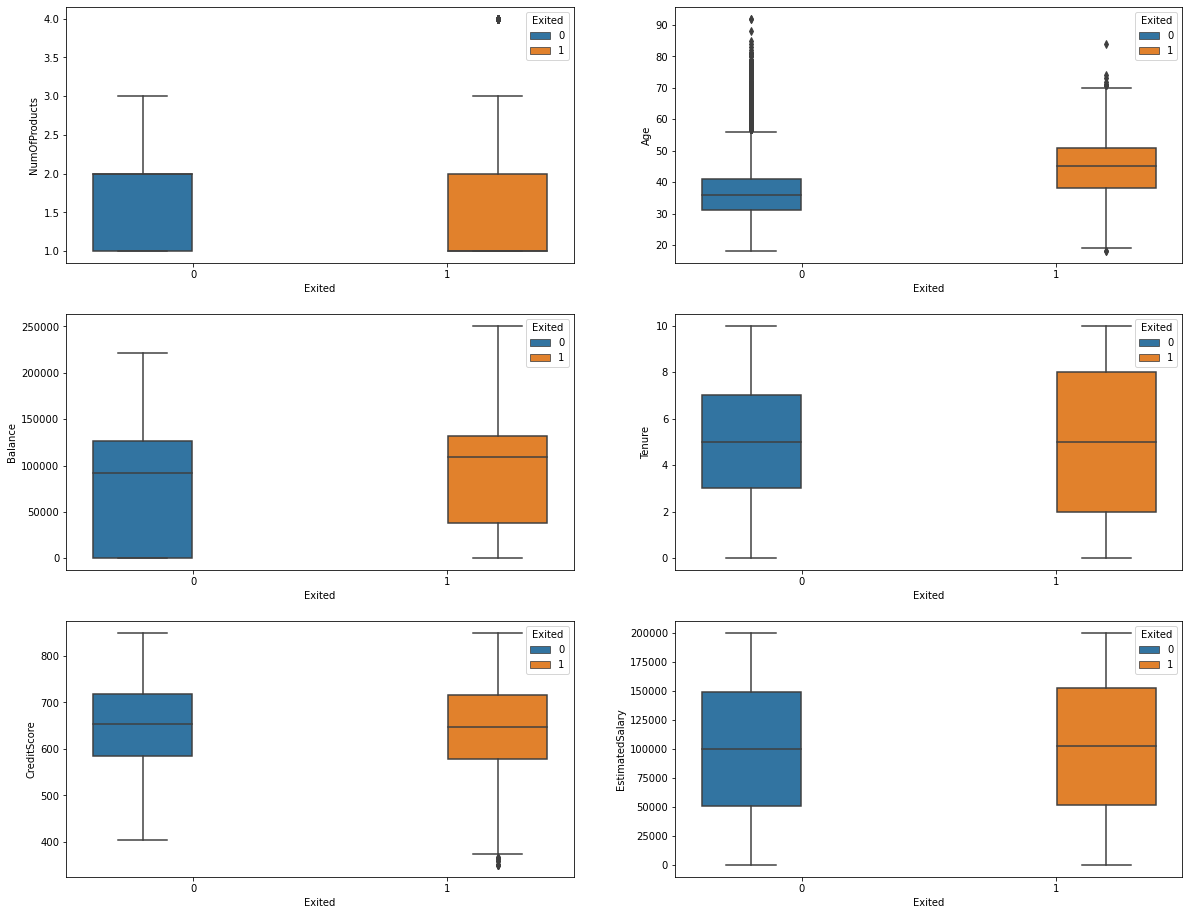

In [218]:
# Numerical columns
# NumOfProducts  Age	Balance	EstimatedSalary	Tenure	CreditScore

fig, axarr = plt.subplots(3, 2, figsize = [20, 16])
sns.boxplot(y = 'NumOfProducts', x = 'Exited', hue = 'Exited', data=trimmed_data, ax=axarr[0][0])
sns.boxplot(y = 'Age', x = 'Exited', hue = 'Exited', data=trimmed_data, ax=axarr[0][1])
sns.boxplot(y = 'Balance', x = 'Exited', hue = 'Exited', data=trimmed_data, ax=axarr[1][0])
sns.boxplot(y = 'Tenure', x = 'Exited', hue = 'Exited', data=trimmed_data, ax=axarr[1][1])
sns.boxplot(y = 'CreditScore', x = 'Exited', hue = 'Exited', data=trimmed_data, ax=axarr[2][0])
sns.boxplot(y = 'EstimatedSalary', x = 'Exited', hue = 'Exited', data=trimmed_data, ax=axarr[2][1])
plt.show()

Some observations:

1. Most of the customers own 1 or 2 products from the bank and the retention rate is not affected by the products.

2. The older customers are more likely to leave than the younger customers.

3. Customers with higher bank balances are leaving the bank which is worrying.

4. Customers that are new to the bank or have been with the bank for a long time are more likely to leave.

5. Customers with a low credit score are prone to leaving, maybe due to certain services being offered to customers with a credit score above a threshold.

6. The Estimated Salary does not affect the customer churn.

Based on the above observations of Numerical and Categorical data, it would be okay to drop the columns: 'NumOfProducts' and 'EstimatedSalary'. We can create new columns that will help us in our model building.

### Feature engineering

In [219]:
# Train-test split
from sklearn.model_selection import train_test_split

# X_data = trimmed_data[numerical_columns + categorical_columns]
# y_data = trimmed_data['Exited'].to_numpy()

df_train, df_test = train_test_split(trimmed_data, test_size=0.2, random_state=1) # choose a random seed to be consistent

df_train


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08,0
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82,0
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18,0
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17,0
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,Germany,Male,47,7,107363.29,1,1,1,66799.28,0
7813,684,Germany,Female,63,3,81245.79,1,1,0,69643.31,1
905,672,France,Female,45,9,0.00,1,1,1,92027.69,1
5192,663,France,Female,39,8,0.00,2,1,1,101168.90,0


In [220]:
# Balance/Salary ratio

df_train['BalanceSalRatio'] = df_train['Balance']/df_train['EstimatedSalary']

df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalRatio
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08,0,0.906997
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82,0,2.573111
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1,2.842061
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18,0,1.634401
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17,0,0.750805


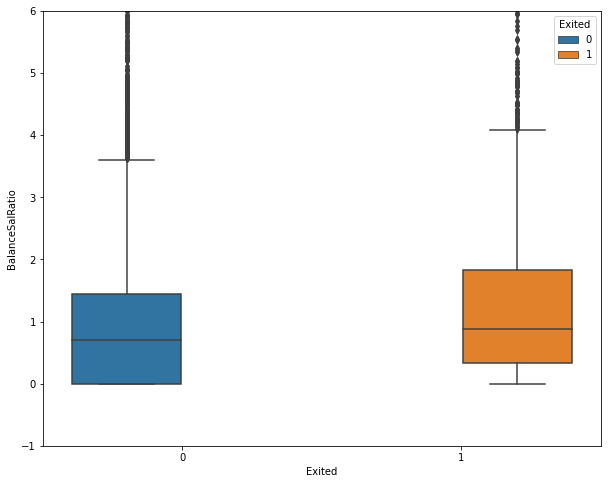

In [221]:
plt.figure(figsize=[10, 8])
sns.boxplot(y = 'BalanceSalRatio', x = 'Exited', hue = 'Exited', data = df_train)
plt.ylim([-1, 6])
plt.show()

The above portrays that customers with higher balance to salary ratio are churning more. This might be a worrying trend for the bank as this might impact their loan capital.

In [222]:
# Tenure/Age standardization
# Since tenure is a function of age, we can create a feature that standardizes the tenure with age

df_train['TenureAgeRatio'] = df_train['Tenure']/df_train['Age']

df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalRatio,TenureAgeRatio
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08,0,0.906997,0.103448
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82,0,2.573111,0.137931
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1,2.842061,0.127660
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18,0,1.634401,0.115385
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17,0,0.750805,0.242424


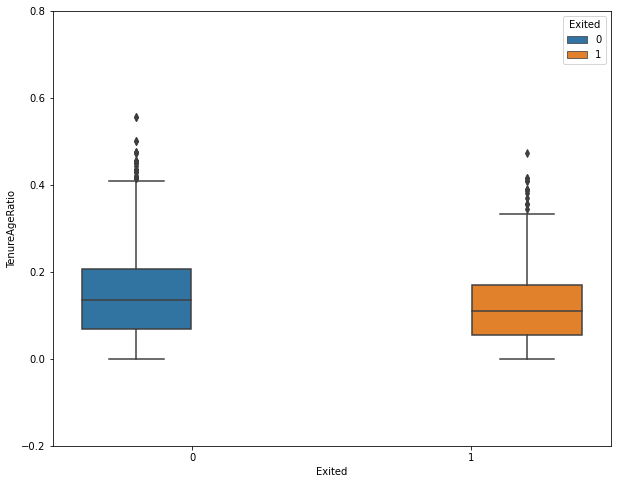

In [223]:
plt.figure(figsize=[10, 8])
sns.boxplot(y = 'TenureAgeRatio', x = 'Exited', hue = 'Exited', data = df_train)
plt.ylim([-0.2,0.8])
plt.show()

In [224]:
# Credit Score/ Age ratio
# Since credit score depends on the customers age especially during their early years, we can create a new feature to look at that.

df_train['CreditScoreByAge'] = df_train['CreditScore']/df_train['Age']

df_train.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalRatio,TenureAgeRatio,CreditScoreByAge
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08,0,0.906997,0.103448,21.655172
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82,0,2.573111,0.137931,21.586207
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1,2.842061,0.127660,13.021277
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18,0,1.634401,0.115385,12.423077
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17,0,0.750805,0.242424,21.636364


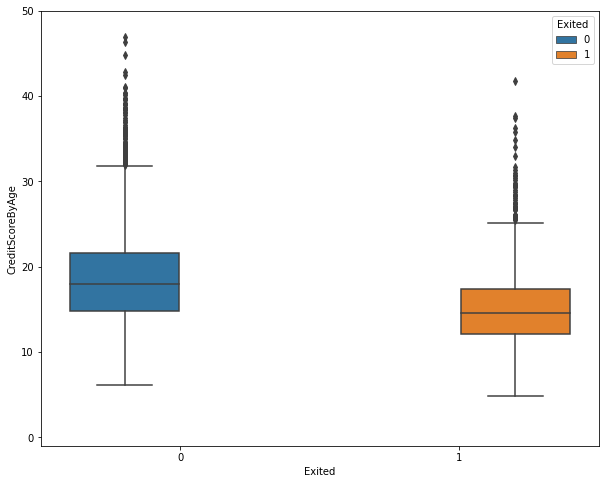

In [225]:
plt.figure(figsize=[10, 8])
sns.boxplot(y = 'CreditScoreByAge', x = 'Exited', hue = 'Exited', data = df_train)
plt.ylim([-1,50])
plt.show()

As expected, lower credit scores are more likely to churn. 

In [226]:
df_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalRatio,TenureAgeRatio,CreditScoreByAge
2694,628,Germany,Male,29,3,113146.98,2,0,1,124749.08,0,0.906997,0.103448,21.655172
5140,626,France,Female,29,4,105767.28,2,0,0,41104.82,0,2.573111,0.137931,21.586207
2568,612,Germany,Female,47,6,130024.87,1,1,1,45750.21,1,2.842061,0.127660,13.021277
3671,646,Germany,Female,52,6,111739.40,2,0,1,68367.18,0,1.634401,0.115385,12.423077
7427,714,Spain,Male,33,8,122017.19,1,0,0,162515.17,0,0.750805,0.242424,21.636364


### Data preparation for model fitting

Since the columns are not properly arranged, it might be a bit cumbersome to do manipulations later. So lets arrange the columns according to their type.

In [227]:
# Arrange columns

# numerical_columns = numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge']
df_train = df_train[['Exited'] + numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge'] + categorical_columns]

df_train.head()

,Exited,NumOfProducts,EstimatedSalary,Age,Balance,Tenure,CreditScore,BalanceSalRatio,TenureAgeRatio,CreditScoreByAge,Geography,Gender,HasCrCard,IsActiveMember
2694,0,2,124749.08,29,113146.98,3,628,0.906997,0.103448,21.655172,Germany,Male,0,1
5140,0,2,41104.82,29,105767.28,4,626,2.573111,0.137931,21.586207,France,Female,0,0
2568,1,1,45750.21,47,130024.87,6,612,2.842061,0.127660,13.021277,Germany,Female,1,1
3671,0,2,68367.18,52,111739.40,6,646,1.634401,0.115385,12.423077,Germany,Female,0,1
7427,0,1,162515.17,33,122017.19,8,714,0.750805,0.242424,21.636364,Spain,Male,0,0


For categorical variables with 0 and 1 values, we convert the 0's to -1 to capture the negative correlation.

In [228]:
# Convert binary values to [-1, 1]

df_train = df_train.replace({'HasCrCard': 0, 'IsActiveMember': 0}, -1)

df_train.head()

,Exited,NumOfProducts,EstimatedSalary,Age,Balance,Tenure,CreditScore,BalanceSalRatio,TenureAgeRatio,CreditScoreByAge,Geography,Gender,HasCrCard,IsActiveMember
2694,0,2,124749.08,29,113146.98,3,628,0.906997,0.103448,21.655172,Germany,Male,-1,1
5140,0,2,41104.82,29,105767.28,4,626,2.573111,0.137931,21.586207,France,Female,-1,-1
2568,1,1,45750.21,47,130024.87,6,612,2.842061,0.127660,13.021277,Germany,Female,1,1
3671,0,2,68367.18,52,111739.40,6,646,1.634401,0.115385,12.423077,Germany,Female,-1,1
7427,0,1,162515.17,33,122017.19,8,714,0.750805,0.242424,21.636364,Spain,Male,-1,-1


In [229]:
from sklearn.preprocessing import OneHotEncoder

# One-Hot encode the string categorical data
encoder = OneHotEncoder(sparse=False)
OH_cols_train = pd.DataFrame(encoder.fit_transform(df_train[['Geography', 'Gender']]))

# One-Hot encoder removes index, put it back
OH_cols_train.index = df_train.index

# Get the feature names 
OH_cols_train.columns = encoder.get_feature_names_out(['Geography', 'Gender'])

# Remove categorical columns that are One-Hot encoded
num_train = df_train.drop(['Geography', 'Gender'], axis=1)

# Add One-Hot encoded columns to numerical columns
df_train = pd.concat([num_train, OH_cols_train], axis=1)

df_train.head()

,Exited,NumOfProducts,EstimatedSalary,Age,Balance,Tenure,CreditScore,BalanceSalRatio,TenureAgeRatio,CreditScoreByAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2694,0,2,124749.08,29,113146.98,3,628,0.906997,0.103448,21.655172,-1,1,0.0,1.0,0.0,0.0,1.0
5140,0,2,41104.82,29,105767.28,4,626,2.573111,0.137931,21.586207,-1,-1,1.0,0.0,0.0,1.0,0.0
2568,1,1,45750.21,47,130024.87,6,612,2.842061,0.127660,13.021277,1,1,0.0,1.0,0.0,1.0,0.0
3671,0,2,68367.18,52,111739.40,6,646,1.634401,0.115385,12.423077,-1,1,0.0,1.0,0.0,1.0,0.0
7427,0,1,162515.17,33,122017.19,8,714,0.750805,0.242424,21.636364,-1,-1,0.0,0.0,1.0,0.0,1.0


In [230]:
# MinMax scaling the numerical variables

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
MinMaxScaled_cols = pd.DataFrame(scaler.fit_transform(df_train[numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge']]))
MinMaxScaled_cols.index = df_train.index
MinMaxScaled_cols.columns = scaler.get_feature_names_out(numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge'])

cat_train = df_train.drop(['Exited'] + numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge'], axis=1)

df_train = pd.concat([df_train.Exited, MinMaxScaled_cols, cat_train], axis=1)
df_train.head()

,Exited,NumOfProducts,EstimatedSalary,Age,Balance,Tenure,CreditScore,BalanceSalRatio,TenureAgeRatio,CreditScoreByAge,HasCrCard,IsActiveMember,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2694,0,0.333333,0.623664,0.148649,0.450968,0.3,0.556,0.000684,0.186207,0.399651,-1,1,0.0,1.0,0.0,0.0,1.0
5140,0,0.333333,0.205189,0.148649,0.421555,0.4,0.552,0.001940,0.248276,0.398010,-1,-1,1.0,0.0,0.0,1.0,0.0
2568,1,0.000000,0.228431,0.391892,0.518238,0.6,0.524,0.002143,0.229787,0.194237,1,1,0.0,1.0,0.0,1.0,0.0
3671,0,0.333333,0.341584,0.459459,0.445358,0.6,0.592,0.001232,0.207692,0.180005,-1,1,0.0,1.0,0.0,1.0,0.0
7427,0,0.000000,0.812609,0.202703,0.486322,0.8,0.728,0.000566,0.436364,0.399204,-1,-1,0.0,0.0,1.0,0.0,1.0


In [267]:
# Pipeline for the test data

def DataPrepPipeline(df_transformed, df_train_cols):
    
    # Add new features
    df_transformed['BalanceSalRatio'] = df_transformed['Balance']/df_transformed['EstimatedSalary']
    df_transformed['TenureAgeRatio'] = df_transformed['Tenure']/(df_transformed['Age'])
    df_transformed['CreditScoreByAge'] = df_transformed['CreditScore']/(df_transformed['Age'])

    # Reorder the columns
    df_transformed= df_transformed[['Exited'] + numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge'] + categorical_columns]

    
    # Convert binary values to [-1, 1]
    df_transformed = df_transformed.replace({'HasCrCard': 0, 'IsActiveMember': 0}, -1)

    
    # One-Hot encode the string categorical data
    OH_cols_test= pd.DataFrame(encoder.transform(df_transformed[['Geography', 'Gender']]))
    OH_cols_test.index = df_transformed.index
    OH_cols_test.columns = encoder.get_feature_names_out(['Geography', 'Gender'])
    num_test= df_transformed.drop(['Geography', 'Gender'], axis=1)
    df_transformed = pd.concat([num_test, OH_cols_test], axis=1)

    # MinMax scaling the numerical variables
    MinMaxScaled_cols = pd.DataFrame(scaler.transform(df_transformed[numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge']]))
    MinMaxScaled_cols.index = df_transformed.index
    MinMaxScaled_cols.columns = scaler.get_feature_names_out(numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge'])
    cat_test = df_transformed.drop(numerical_columns + ['BalanceSalRatio', 'TenureAgeRatio', 'CreditScoreByAge'] + ['Exited'], axis=1)
    df_transformed = pd.concat([df_transformed.Exited, MinMaxScaled_cols, cat_test], axis=1)

    # # Ensure that the order of the columns are same in train and test
    # df_transformed = df_transformed[df_train_cols]

    return df_transformed
    

### Model fitting and selection

We will try a couple of models:

1. Logistic Regression with different kernels
2. SVM with different kernels
3. Ensemble models like Random Forests, XGBoost

In [301]:
# Function to give best model score and parameters
def best_model(model):
    print(f'Best Score: {model.best_score_}')
    print(f'Best Hyperparameters: {model.best_params_}')
    print(f'Best Estimator: {model.best_estimator_}')
    
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_df, tpr_df, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_df, tpr_df)

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from scipy.stats import loguniform

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

/Users/rishabh/miniforge3/envs/TensorFlow/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
# Fit primal logistic regression

X, y = df_train.loc[:, df_train.columns != 'Exited'], df_train.Exited

# define model
model = LogisticRegression(dual=False)
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define search space
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
# define search
log_primal = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1, verbose=0)
# execute search
result = log_primal.fit(X, y)
# summarize result
best_model(result)

In [303]:
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(log_primal_Grid)

Best Score: 0.8168749999999999
Best Hyperparameters: {'C': 100, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 250, 'penalty': 'l2', 'tol': 1e-05}
Best Estimator: LogisticRegression(C=100, max_iter=250, tol=1e-05)


In [ ]:
# Fit Logistic Regression with polynomial kernel degree 2

poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
X, y = df_train_pol2, df_train.Exited

model = LogisticRegression()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
space = dict()
space['solver'] = ['newton-cg', 'lbfgs', 'liblinear']
space['penalty'] = ['none', 'l1', 'l2', 'elasticnet']
space['C'] = loguniform(1e-5, 100)
log_pol2 = RandomizedSearchCV(model, space, n_iter=500, scoring='accuracy', n_jobs=-1, cv=cv, random_state=1)
result = log_pol2.fit(X, y)
# summarize result
best_model(result)


In [307]:
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(df_train_pol2,df_train.Exited)
best_model(log_pol2_Grid)

Best Score: 0.8571250000000001
Best Hyperparameters: {'C': 50, 'fit_intercept': True, 'intercept_scaling': 1, 'max_iter': 300, 'penalty': 'l2', 'tol': 0.0001}
Best Estimator: LogisticRegression(C=50, max_iter=300, solver='liblinear')


In [311]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

Best Score: 0.8534997922709024
Best Hyperparameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
Best Estimator: SVC(C=100, gamma=0.1, probability=True)


In [312]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(SVM_grid)

Best Score: 0.8537497610248082
Best Hyperparameters: {'C': 100, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly', 'probability': True}
Best Estimator: SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)


In [313]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(RanFor_grid)

Best Score: 0.8622500000000001
Best Hyperparameters: {'max_depth': 8, 'max_features': 9, 'min_samples_split': 5, 'n_estimators': 100}
Best Estimator: RandomForestClassifier(max_depth=8, max_features=9, min_samples_split=5)


In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)
best_model(xgb_grid)

### Best model fits

In [321]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='auto',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

LogisticRegression(C=100, max_iter=250, tol=1e-05)

In [323]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
df_train_pol2 = poly2.fit_transform(df_train.loc[:, df_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='auto', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(df_train_pol2,df_train.Exited)

LogisticRegression(C=10, max_iter=300, solver='liblinear')

In [324]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, gamma=0.1, probability=True)

In [325]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

SVC(C=100, degree=2, gamma=0.1, kernel='poly', probability=True)

In [328]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0, min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None, oob_score=False, random_state=None, verbose=0, warm_start=False)
RF.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

RandomForestClassifier(max_depth=8, max_features=6, min_samples_split=3,
                       n_estimators=50)

In [337]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=1, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(df_train.loc[:, df_train.columns != 'Exited'],df_train.Exited)

/Users/rishabh/miniforge3/envs/TensorFlow/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0.01, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=5, missing=1,
              monotone_constraints='()', n_estimators=20, n_jobs=1, nthread=1,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=0,
              silent=True, subsample=1, tree_method='exact',
              validate_parameters=1, ...)

### Confusion matrices

In [330]:
print(classification_report(df_train.Exited, log_primal.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      6378
           1       0.64      0.22      0.33      1622

    accuracy                           0.82      8000
   macro avg       0.74      0.60      0.61      8000
weighted avg       0.79      0.82      0.78      8000



In [331]:
print(classification_report(df_train.Exited,  log_pol2.predict(df_train_pol2)))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      6378
           1       0.78      0.44      0.56      1622

    accuracy                           0.86      8000
   macro avg       0.82      0.70      0.74      8000
weighted avg       0.85      0.86      0.85      8000



In [332]:
print(classification_report(df_train.Exited,  SVM_RBF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6378
           1       0.83      0.39      0.53      1622

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.72      8000
weighted avg       0.86      0.86      0.84      8000



In [333]:
print(classification_report(df_train.Exited,  SVM_POL.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6378
           1       0.83      0.37      0.51      1622

    accuracy                           0.86      8000
   macro avg       0.85      0.68      0.71      8000
weighted avg       0.85      0.86      0.83      8000



In [334]:
print(classification_report(df_train.Exited,  RF.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      6378
           1       0.87      0.50      0.63      1622

    accuracy                           0.88      8000
   macro avg       0.88      0.74      0.78      8000
weighted avg       0.88      0.88      0.87      8000



In [338]:
print(classification_report(df_train.Exited,  XGB.predict(df_train.loc[:, df_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6378
           1       0.83      0.52      0.64      1622

    accuracy                           0.88      8000
   macro avg       0.86      0.75      0.78      8000
weighted avg       0.88      0.88      0.87      8000



In [339]:
y = df_train.Exited
X = df_train.loc[:, df_train.columns != 'Exited']
X_pol2 = df_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

/Users/rishabh/miniforge3/envs/TensorFlow/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


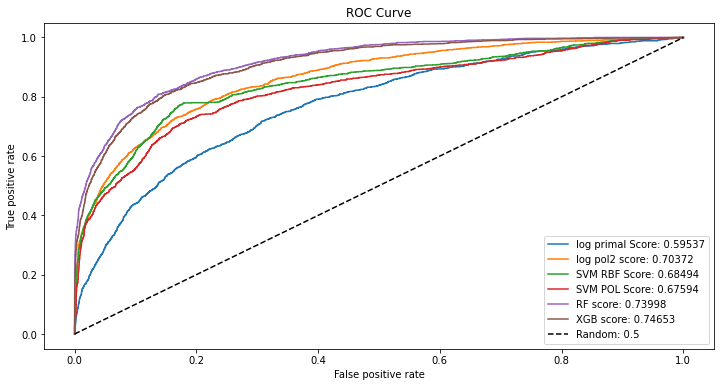

In [340]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

In [342]:
# Make the data transformation for test data
df_test = DataPrepPipeline(df_test,df_train.columns)
df_test = df_test.mask(np.isinf(df_test))
df_test = df_test.dropna()
df_test.shape

(2000, 17)

In [345]:
print(classification_report(df_test.Exited,  XGB.predict(df_test.loc[:, df_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.78      0.48      0.59       415

    accuracy                           0.86      2000
   macro avg       0.83      0.72      0.76      2000
weighted avg       0.86      0.86      0.85      2000



/Users/rishabh/miniforge3/envs/TensorFlow/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


/Users/rishabh/miniforge3/envs/TensorFlow/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


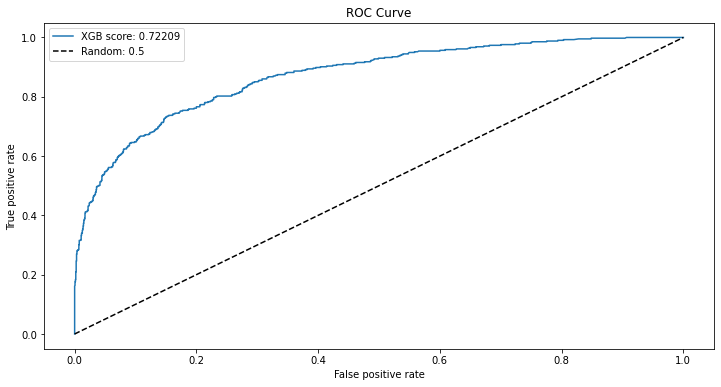

In [346]:
auc_XGB_test, fpr_XGB_test, tpr_XGB_test = get_auc_scores(df_test.Exited, XGB.predict(df_test.loc[:, df_test.columns != 'Exited']),
                                                       XGB.predict_proba(df_test.loc[:, df_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_XGB_test, tpr_XGB_test, label = 'XGB score: ' + str(round(auc_XGB_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()